<h1>Identifying Key Characteristics for Subscription to Game Newsletters</h1>

<h2>Introduction</h2>

<p>In modern video game industry, newsletter is a common make connections to the players. The game company can convey message and post advertisements using the newsletter. Therefore, to increase the profit and the marketing strategies, it is vital to know the characteristics of players who are more willing to subscribe the newsletter.</p>

<p>This project aims to discuss what player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how these features differ between various player types.</p>

<p>R is used in this project to analyze the dataset and summarize them into plots and tables. The dataset used in the project is a comma-separated value (csv) file called <code>player.csv</code>. The dataset includes the following columns:</p>

- experience: The experience of the player (Amateur, Beginner, Pro, Regular, Veteran)
- subscribe: Whether the player subscribed to a game-related newsletter (TRUE, FALSE)
- hashedEmail: The hashed email of the player
- played_hours: The time the player spent at playing the game (in hours)
- name: The player's name
- gender: The player's gender
- Age: The player's age.

<p><b>... !!! DATA DESCRIPTION</b></p>

<h2>Methods & Results</h2>

<p>The purpose of this project is to find out what player characteristics and behaviours can most successfully predict if they subscribed to a game-related newsletter. First of all, in order to analyze and visualize the results using R, some packages are required to be loaded, including <code>tidyverse</code> and <code>tidymodels</code>.</p>

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

<p>The function <code>read_csv()</code> can consume the path of a file. We will use it to load the dataset. Let's call the data frame <code>players</code>. We can use the absolute path which always starts with a slash <code>/</code> and lists out the sequence of folders from the root (Timbers et al., 2024). In this case, the absolute path of <code>players.csv</code> is <code>/home/dsci-100-project-yclin9/players.csv</code>.</p>

<p>However, we can use the relative path instead. A relative path only list out the sequence of folders from our current working file. Since the <code>csv</code> file is in the same folder from our current working file, the relative path of the file is <code>players.csv</code></p>

<p>The function <code>head()</code> is designed to look first couple lines of the data frame. Here we can use it to preview the data frame <code>players</code>.</p>

In [15]:
players <- read_csv("players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


<p>After loading the dataset, the next thing to do is to wrangle and clean the data to the format necessary for the data analysis. Let's name the new data frame <code>players_clean</code>. The <code>mutate()</code> function is used for modifying or adding the columns. For a classification model, the outcome should be a factor rather than a logical. Hence, <code>as_factor()</code> is used to modify the column <code>experience</code> to become logical.</p>

<p>The <code>select()</code> function can help select the columns we need. In this project, we use K-nearest neighbor classification algorithm, which can only predict the result using numeric data (detailed explanation will be given later). Looking at the dataset, only <code>played_hours</code> and <code>Age</code> are numeric data. Therefore, we select <code>played_hours</code>, <code>Age</code>, and <code>subscribe</code> from the dataset. Also, observations that lack the data <code>NA</code> are removed using <code>drop_na()</code></p>

<p>We except both players' age and played time are predictive of subscribing the game-related newsletter. Young players tend to be more curious and enthusiastic about the game, which makes them have a higher possibility to subscribe for the newsletter. Moreover, people who spend more time on the game shows that they have more interest and willingness to following game-relevant information or update.</p>

<p>Using <code>head()</code> to preview the first couple rows of the data frame, we can see that there are now only needed columns. The variables <code>played_hours</code> and <code>Age</code> are used to evaluate the result and <code>subscribe</code> is the variable we want to label. Additionally, the data type of <code>subscribe</code> is changed from logical (<code>lgl</code>) to factor (<code>dbl</code>).</p>

In [3]:
players_clean <- players |>
    mutate(subscribe = as_factor(subscribe)) |>
    select(played_hours, Age, subscribe) |>
    drop_na()

head(players_clean)

played_hours,Age,subscribe
<dbl>,<dbl>,<fct>
30.3,9,TRUE
3.8,17,TRUE
0.0,17,FALSE
0.7,21,TRUE
0.1,21,TRUE
0.0,17,TRUE


<p>To visualize the data in R, we have to us the <code>ggplot2</code> package. The <code>ggplot2</code> is already included in the <code>tidyverse</code> metapackage, so no further action is required here to load the package.</p>

<p>We want to produce a scatter plot, with the time players spent on the x-axis and their age on the y-axis, then color the point based on whether they subscribed to a game-related newsletter. We assign those variables in the <code>aes()</code> function. To create a geometric object, we use a <code>geom_*</code> function. In this case, to generate a scatter plot, we use the function <code>geom_point()</code>, the argument <code>alpha</code> makes the dots translucent (Timbers et al., 2024).</code></p>

<p>Since the values of <code>played_hours</code> concentrate between 0 to 1 (hour), the graph will be difficult to read (the first graph presented below). Therefore, <code>scale_x_log10()</code> is used (the second graph presented below) to scale the plot and make it more readable.</p>

<p>As can be seen in the graph, there are more blue dots in the lower half of the graph, at the other hand, dots in the upper half are usually pink. Plus, at the horizontal direction, there are mostly blue dots in the right half of the graph, while there is a mix of blue dots and pink dots in the left half. Those observations indicate that younger players and players are more willing to subscribe to a game-related newsletter. Despite the relation between those variables, more work has to be done to tell how well the age and played time can successfully predict whether or not the player had subscribed to the game-related newsletter.</p>

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


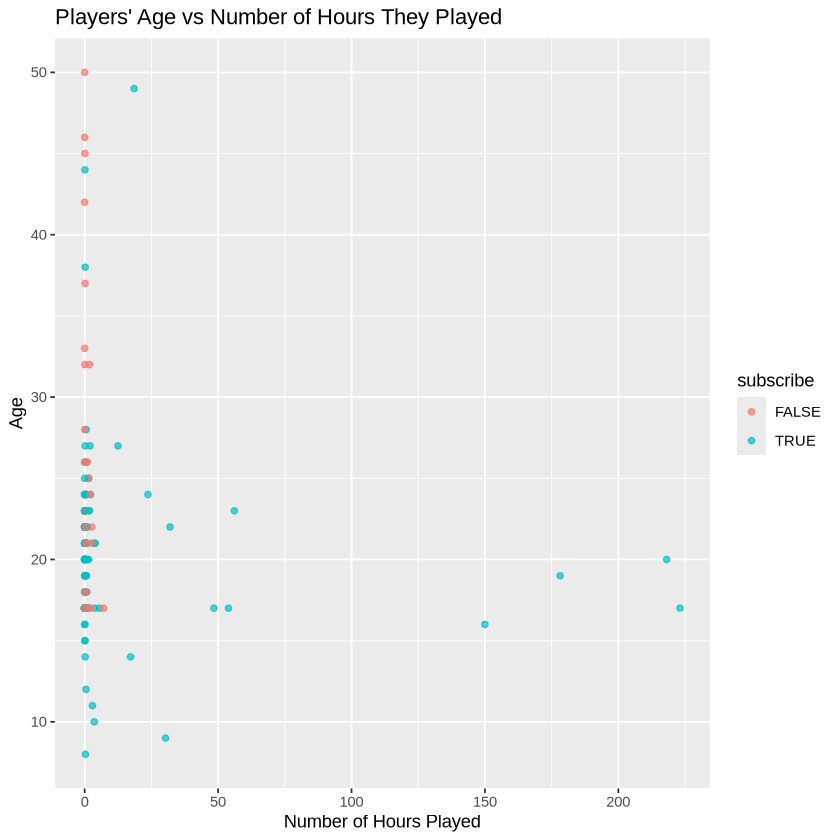

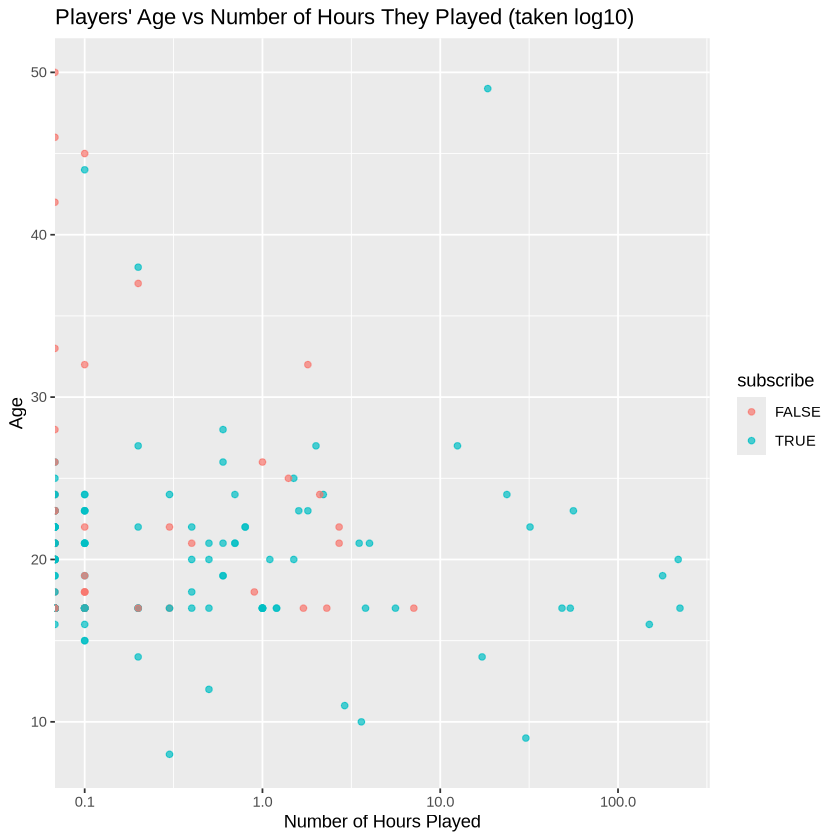

In [4]:
players_plot <- ggplot(players_clean, aes(x = played_hours, y = Age, color = subscribe)) +
                    geom_point(alpha = 0.7) +
                    labs(x = "Number of Hours Played", y = "Age",
                         title = "Players' Age vs Number of Hours They Played")

players_plot_scaled <- ggplot(players_clean, aes(x = played_hours, y = Age, color = subscribe)) +
                    geom_point(alpha = 0.7) +
                    labs(x = "Number of Hours Played", y = "Age",
                         title = "Players' Age vs Number of Hours They Played (taken log10)") +
                    scale_x_log10()


players_plot
players_plot_scaled

<p>We are using an algorithm called K-nearest neighbors classification. This method predict the label of the new observation based on the labels of those observations close the new one.</p>

<p>To train a model using K-nearnest neighbor to predict the label of <code>subscribe</code>, we must first use <code>initial_split()</code> to separate the training and testing sets. The argument <code>prop</code> specifies the proportion of the original data set to train, here we take 80% of the original data as the training set. <code>strata</code> is the categorical variable to predict, which is <code>subscribe</code> in the project.</p>

In [5]:
set.seed(1234)

players_split <- initial_split(players_clean, prop = 0.8, strata = subscribe)
players_training <- training(players_split)
players_testing <- testing(players_split)

<p>The <code>todymodels</code> uses a <code>recipe</code> for all data processing (Timbers et al., 2024). The function <code>recipe()</code> helps create a recipe.</p>

<p>Later on, we must standardize the data to assure that the two variables will influence the results to the same extent. After scaling (<code>step_scale()</code>) and centering (<code>step_center()</code>) all the predictors, they now have a same mean $0$ and standard deviation $1$.</p>

In [6]:
players_recipe <- recipe(subscribe ~ played_hours + Age, data = players_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



<p>We want to create a model specification, and this requires using the function <code>nearest_neighbor()</code>. <code>weight_func = "rectangular"</code> tells that each of the K nearest neighbors has the same weight when voting (Timbers et al., 2024). We specify the number of <code>neighbors</code> as <code>tune()</code> since we are looking for the best K.</p>

<p>In <code>set_engine()</code>, we select <code>kknn</code> to work on K-nearest neighbor problem. In <code>set_mode()</code>, we specify that we are now performing a classification problem.</p>

In [7]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

<p>To determine the accuracy of the model, we use a method called cross-validation. We split the training data into $C$ chunks with equal size. One chunk is used as the validation set and the rest are called training set. We calculate the mean of every result to get the accuracy. Here we use 5-fold cross-validation.</p>

In [8]:
players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

<p>We use <code>seq()</code> to create a data frame that has values from 1 to 30, stored by <code>k_val</code>.</p>
<p>Everything required is now prepare. We use the <code>workflow()</code> function to put them together. Using <code>add_recipe()</code> and <code>add_model()</code>, we combined the steps done before. Next, we use <code>tune_grid()</code> to let the model run different values of K (from $1$ to $30$ here).</p>

In [9]:
set.seed(1234)

k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

knn_results <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = players_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_results |>
    filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4546237,5,0.022435272,Preprocessor1_Model01
2,accuracy,binary,0.4546237,5,0.022435272,Preprocessor1_Model02
3,accuracy,binary,0.5393817,5,0.029700165,Preprocessor1_Model03
4,accuracy,binary,0.5195833,5,0.027251386,Preprocessor1_Model04
5,accuracy,binary,0.5791398,5,0.027665143,Preprocessor1_Model05
6,accuracy,binary,0.5853898,5,0.023603195,Preprocessor1_Model06
7,accuracy,binary,0.6170430,5,0.014419130,Preprocessor1_Model07
8,accuracy,binary,0.6037097,5,0.007407073,Preprocessor1_Model08
9,accuracy,binary,0.5849731,5,0.021060949,Preprocessor1_Model09


<p>Now, after we get the result, the only thing we have to do is to visualize the result. We use the functions in the <code>ggplot2</code> package to produce the plot.</p>

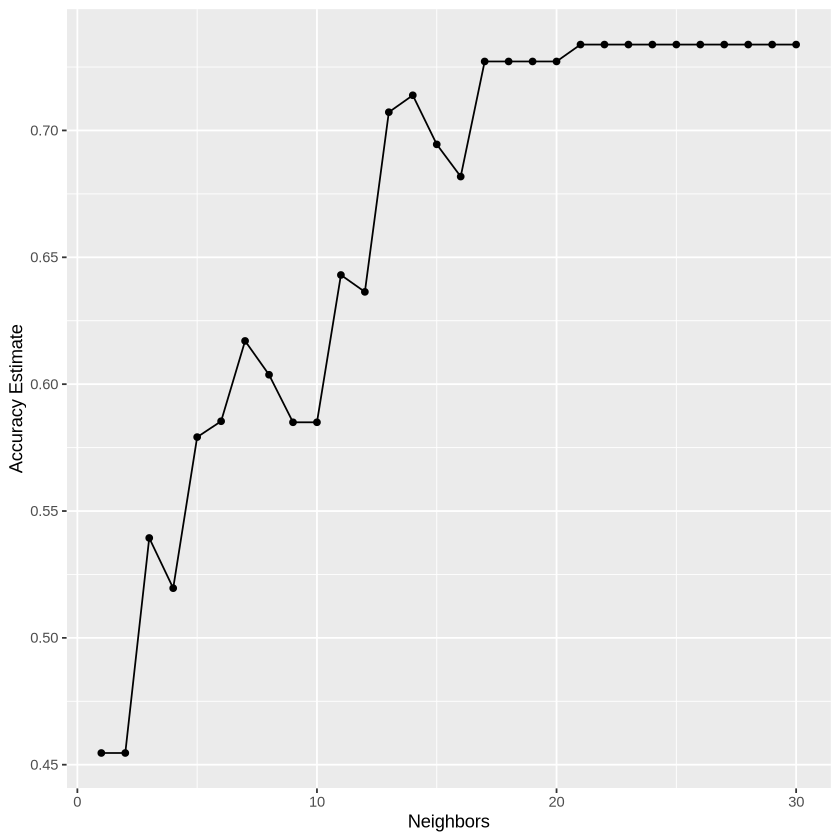

In [10]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")

accuracy_vs_k

<p>The code below helps sort the results by descending order of mean and take the first result, which will let us get the number of neighbors who has the highest number of mean this time.</p>

In [11]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 21

<p>After getting the value of <code>best_k</code>, we can now evaluate the testing set. The process is mostly same as what was done before, except we changed the values of <code>neighbors</code> from <code>tune()</code> to <code>best_k</code> since we already knew the value.</p>

<p>The function <code>predict()</code> produces a single-column data frame with the predictions of observations in the testing set. Also, we use <code>bind_cols</code> to combined it with the original testing set.</p>

In [12]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_testing)

prediction <- predict(knn_fit, players_testing) |>
    bind_cols(players_testing)

prediction

.pred_class,played_hours,Age,subscribe
<fct>,<dbl>,<dbl>,<fct>
TRUE,30.3,9,TRUE
TRUE,0.0,17,FALSE
TRUE,0.1,21,TRUE
TRUE,0.0,17,TRUE
TRUE,0.2,22,TRUE
TRUE,0.0,17,TRUE
TRUE,0.3,8,TRUE
TRUE,0.0,33,FALSE
TRUE,0.0,17,TRUE


<p>Here we check the accuracy of the prediction.</p>

In [13]:
accuracy <- prediction |>
    accuracy(truth = subscribe, estimate = .pred_class, event_level = "first")

accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.725


<h2>Discussion</h2>

<p>Based on the results we got, the model has an accuracy of $72.5\%$ of pridicting whether the players subsrribe a game-related newletter using the players' age and time played when $K=21$. Although this seems to be quite a successful result, if we use <code>conf_mat()</code> to check the confusion matrix, a tool that can check the prediction and the actual value for the observations, we can see that the model predicted all observations as <code>TRUE</code>. This is not an ideal result that indicates the model may be biased, failing to distinguish between the two classes.</p>

In [14]:
confusion <- prediction |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion

          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE     11   29

<p>There are some limitations for this project that leads to this conclusion For instance, the sample size of the data we have is too small, there are only $194$ records, which is too little to build the model. With the lack of enough data, cross-validation or the split of training and testing data may be unstable and inaccurate, especially in our data, the number of players who subscribed and not subscribe is uneven. The performance will vary depending on the folds and splits.</p>

<p>Also, due to the limitations of the algorithm we used, only two variables are compared. Hence, it could not be confirmed that the two chracteristics are the best arguments to use.</p>

<p>The topic discussed in this project could lead to many other research questions in the future. For example, we might want to include other variables to make a more comprehensive analysis. The game companies might also want to produce further research about how to attract the players using the newsletter.</p>

<h2>Reference</h2>

<p>Timbers, T., Lee, M., & Campbell, T. (2024, August 26). <i>Data science: A First Introduction.</i> https://datasciencebook.ca/ </p>